# 07.2 - KNN. Upgraded

The updated version of the KNN code includes:
- Hyperparameter Tuning (Optimal n_neighbors using cross-validation)
- Dimensionality Reduction (Using PCA)
- Weighted Neighbors (weights='distance')


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load dataset
df = pd.read_csv("bank_numeric.csv")

In [ ]:
# Define features and target
target_column = "deposit"
X = df.drop(columns=[target_column])
y = df[target_column]

In [ ]:
# Feature scaling (important for KNN since it relies on distance calculations)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Dimensionality reduction using PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 21)),  # Trying k from 1 to 20
    'weights': ['uniform', 'distance'],  # Try both weighting strategies
    'metric': ['minkowski', 'euclidean', 'manhattan']  # Different distance metrics
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [ ]:
# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

In [ ]:
# Train the best KNN model
best_knn = grid_search.best_estimator_

In [ ]:
# Make predictions
y_pred = best_knn.predict(X_test)

In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# lower than a few previous models
# why?
# ChatGPT answer:
# No Learning: It doesn’t learn patterns, 
# just stores data and compares distances.
# High-Dimensional Issues: Performance 
# drops with too many features (curse of dimensionality).

# I decided to update the code and see if I can improve metrics

Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       609
           1       0.79      0.65      0.72       443

    accuracy                           0.78      1052
   macro avg       0.78      0.76      0.77      1052
weighted avg       0.78      0.78      0.78      1052



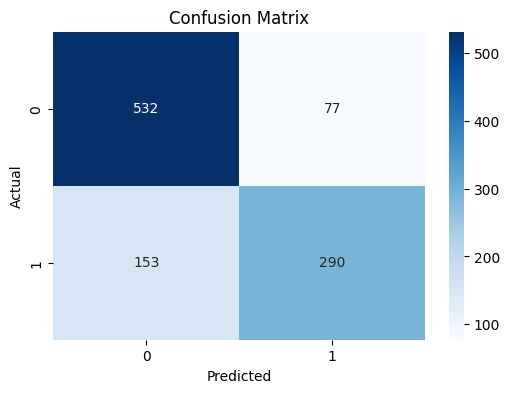

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()